# Melhores resultados na base credits

<ul>
    <li>Árvore de decisão: 98.20</li>
    <li>Random forest: 98.40</li>
    <li>Regras: 97.40</li>
    <li>KNN: 98.60</li>
    <li>Regressão logística: 94.60</li>
    <li>SVM: 98.80</li>
    <li>Redes neurais: 99.60</li>
</ul>

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import shapiro

In [2]:
import pickle
with open('../dataset/credits.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [4]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis = 0)
x_credit.shape

(2000, 3)

In [5]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## GRID SEARCH DECISION TREE


In [6]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


# Random forest

In [7]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 40}
0.9855


KNN

In [8]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


# Regressão logística


In [9]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


# SVM

In [10]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


# Redes neurais

In [11]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [8, 10, 30, 56]}

grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

{'activation': 'relu', 'batch_size': 8, 'solver': 'adam'}
0.9964999999999999


## VALIDAÇÃO CRUZADA

In [12]:
from sklearn.model_selection import cross_val_score, KFold

In [13]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, x_credit, y_credit, cv = kfold)
    #print(scores)
    #print(scores.mean())
    resultados_arvore.append(scores.mean())

    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, x_credit, y_credit, cv=kfold)
    resultados_knn.append(scores.mean())

    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, x_credit, y_credit, cv=kfold)
    resultados_logistica.append(scores.mean())

    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())

    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(rede_neural, x_credit, y_credit, cv=kfold)
    resultados_rede_neural.append(scores.mean())


0


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

1


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

2


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

3


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

4


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

5


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

6


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

7


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

8


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

9


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

10


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

11


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

12


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

13


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

14


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

15


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

16


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

17


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

18


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

19


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

20


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

21


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

22


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

23


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

24


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

25


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

26


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

27


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

28


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

29


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

In [14]:
resultados_arvore, resultados_random_forest

([0.9869999999999999,
  0.9844999999999999,
  0.9905000000000002,
  0.9875,
  0.9879999999999999,
  0.9890000000000001,
  0.9880000000000001,
  0.9875,
  0.9855,
  0.9875,
  0.9860000000000001,
  0.9894999999999999,
  0.9884999999999999,
  0.9869999999999999,
  0.984,
  0.9864999999999998,
  0.9855,
  0.9904999999999999,
  0.9875,
  0.9869999999999999,
  0.984,
  0.9870000000000001,
  0.9884999999999999,
  0.9875,
  0.9865,
  0.9884999999999999,
  0.9879999999999999,
  0.986,
  0.9864999999999998,
  0.9880000000000001],
 [0.984,
  0.982,
  0.983,
  0.986,
  0.9835,
  0.983,
  0.9869999999999999,
  0.984,
  0.9845,
  0.9865,
  0.9865,
  0.985,
  0.9819999999999999,
  0.982,
  0.9854999999999998,
  0.9785,
  0.982,
  0.9834999999999999,
  0.9879999999999999,
  0.9800000000000001,
  0.9855,
  0.9869999999999999,
  0.983,
  0.984,
  0.982,
  0.9844999999999999,
  0.9845,
  0.9795,
  0.9854999999999998,
  0.986])

In [15]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random Forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random Forest,KNN,Logistica,SVM,Rede neural
0,0.9870,0.9840,0.9815,0.9475,0.9845,0.9960
1,0.9845,0.9820,0.9800,0.9465,0.9840,0.9980
2,0.9905,0.9830,0.9795,0.9470,0.9865,0.9965
3,0.9875,0.9860,0.9780,0.9460,0.9850,0.9970
4,0.9880,0.9835,0.9820,0.9465,0.9850,0.9975
5,0.9890,0.9830,0.9780,0.9465,0.9845,0.9970
6,0.9880,0.9870,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9840,0.9800,0.9480,0.9850,0.9965
8,0.9855,0.9845,0.9795,0.9465,0.9840,0.9955
9,0.9875,0.9865,0.9820,0.9465,0.9845,0.9975


In [16]:
resultados.describe()

,Arvore,Random Forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987250,0.983933,0.980050,0.946950,0.985083,0.996967
std,0.001623,0.002296,0.001533,0.000687,0.001280,0.000669
min,0.984000,0.978500,0.977000,0.945500,0.982000,0.995000
25%,0.986500,0.982250,0.979000,0.946500,0.984125,0.996500
50%,0.987500,0.984000,0.980000,0.947000,0.985000,0.997000
75%,0.988000,0.985500,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.988000,0.982500,0.948500,0.987500,0.998000


In [17]:
resultados.var()

Arvore           2.633621e-06
Random Forest    5.271264e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede neural      4.471264e-07
dtype: float64

In [18]:
(resultados.std() / resultados.mean() * 100)

Arvore           0.164380
Random Forest    0.233341
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.067071
dtype: float64

## TESTE DE NORMALIDADE

In [19]:
alpha = 0.05
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9693942666053772, pvalue=0.5227356553077698),
 ShapiroResult(statistic=0.9689286351203918, pvalue=0.5102918148040771),
 ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849),
 ShapiroResult(statistic=0.8889394402503967, pvalue=0.004553247708827257))

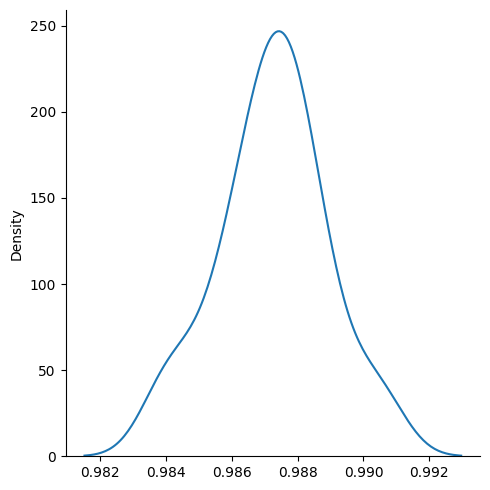

In [20]:
sns.displot(resultados_arvore, kind = 'kde');

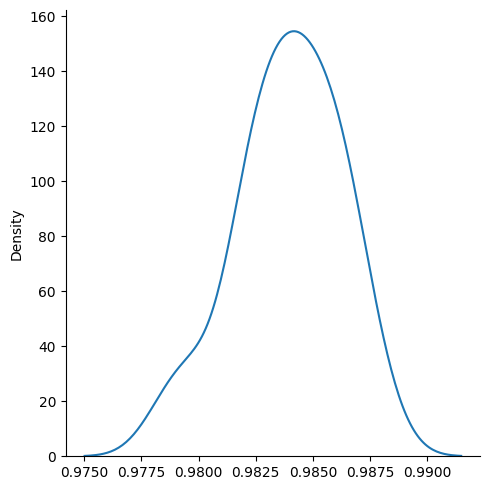

In [21]:
sns.displot(resultados_random_forest, kind = 'kde');

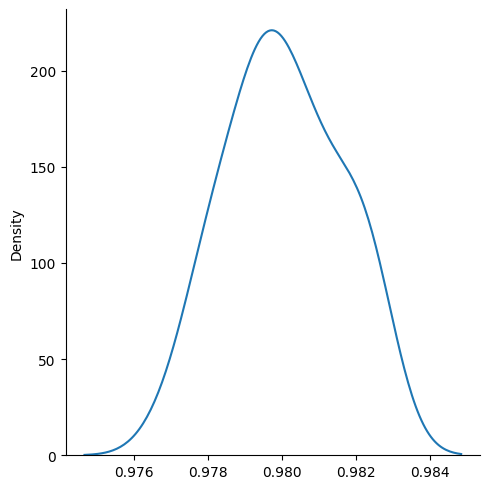

In [22]:
sns.displot(resultados_knn, kind = 'kde');

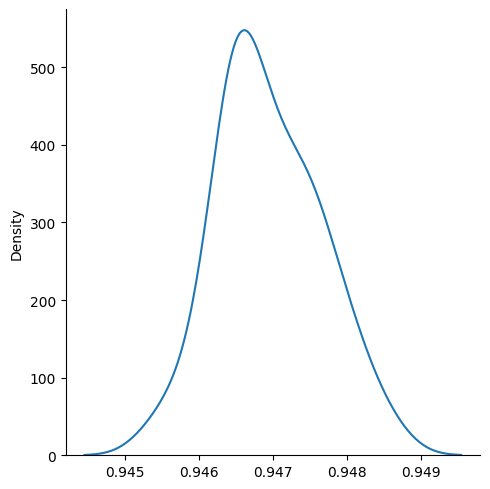

In [23]:
sns.displot(resultados_logistica, kind = 'kde');

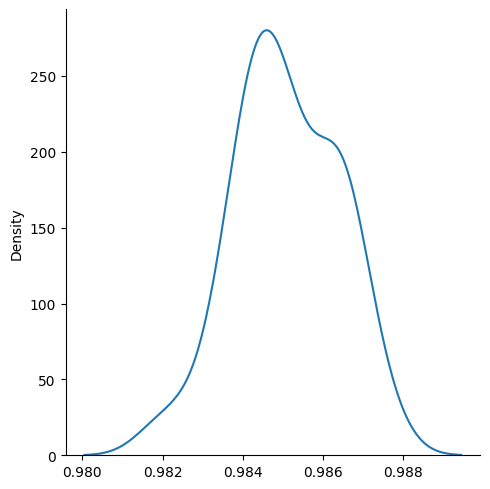

In [24]:
sns.displot(resultados_svm, kind = 'kde');

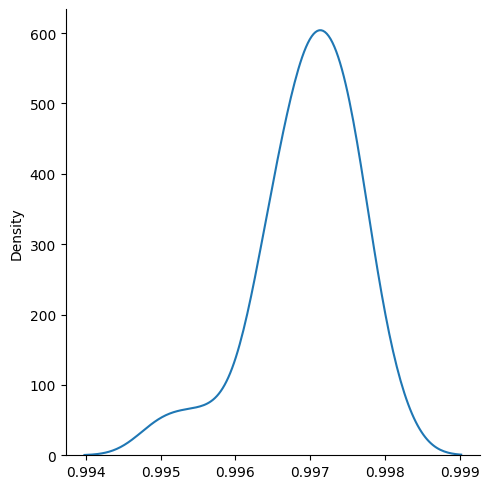

In [25]:
sns.displot(resultados_rede_neural, kind = 'kde');

In [26]:
from scipy.stats import f_oneway

In [27]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_logistica, resultados_knn, resultados_svm, resultados_rede_neural)
p

7.946160300622114e-179

In [28]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipotese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [29]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_logistica, resultados_knn, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                        'knn', 'knn', 'knn', 'knn', 'knn',                                     
                                        'knn', 'knn', 'knn', 'knn', 'knn',                                     
                                        'knn', 'knn', 'knn', 'knn', 'knn',                                     
                                        'knn', 'knn', 'knn', 'knn', 'knn',                                     
                                        'knn', 'knn', 'knn', 'knn', 'knn',                                     
                                        'knn', 'knn', 'knn', 'knn', 'knn', 
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural']}

In [30]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9870,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9880,arvore
...,...,...
175,0.9970,rede_neural
176,0.9975,rede_neural
177,0.9965,rede_neural
178,0.9965,rede_neural


In [31]:
from statsmodels.stats.multicomp import MultiComparison

In [32]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0072    0.0 -0.0083 -0.0061   True
       arvore     logistica  -0.0403    0.0 -0.0414 -0.0392   True
       arvore random_forest  -0.0033    0.0 -0.0044 -0.0022   True
       arvore   rede_neural   0.0097    0.0  0.0086  0.0108   True
       arvore           svm  -0.0022    0.0 -0.0033 -0.0011   True
          knn     logistica  -0.0331    0.0 -0.0342  -0.032   True
          knn random_forest   0.0039    0.0  0.0028   0.005   True
          knn   rede_neural   0.0169    0.0  0.0158   0.018   True
          knn           svm    0.005    0.0  0.0039  0.0061   True
    logistica random_forest    0.037    0.0  0.0359  0.0381   True
    logistica   rede_neural     0.05    0.0  0.0489  0.0511   True
    logistica           svm   0.0381    0.0   0.037  0.0392   

In [33]:
resultados.mean()

Arvore           0.987250
Random Forest    0.983933
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Rede neural      0.996967
dtype: float64

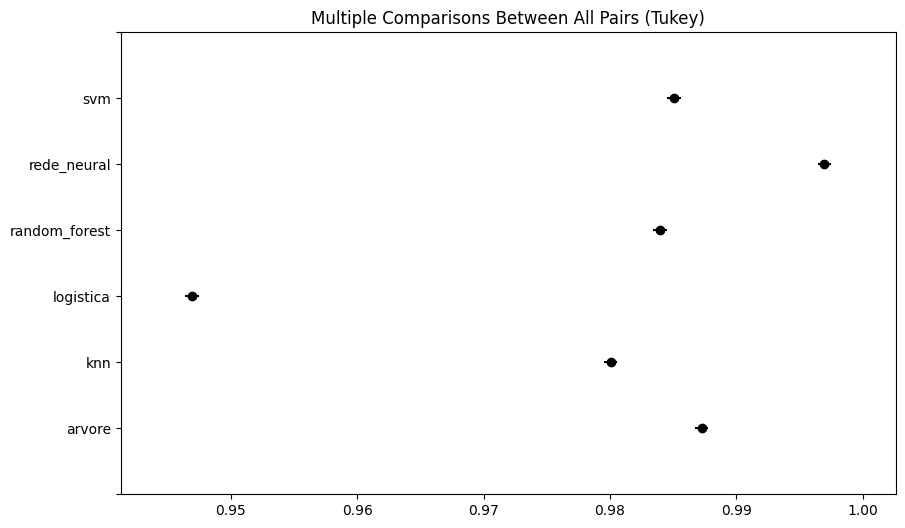

In [34]:
teste_estatistico.plot_simultaneous();

## Salvar um classificador

In [35]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
classificador_rede_neural.fit(x_credit, y_credit)

c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [36]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(x_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [37]:
classificador_svm = SVC(C=2.0, kernel='rbf', probability=True)
classificador_svm.fit(x_credit, y_credit)

SVC(C=2.0, probability=True)

In [46]:
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

## Carregar algoritmos

In [47]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [48]:
novo_registro = x_credit[0]
novo_registro.shape

(3,)

In [49]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [50]:
resposta_rede_neural = rede_neural.predict(novo_registro)

In [51]:
resposta_arvore = arvore.predict(novo_registro)

In [52]:
resposta_svm = svm.predict(novo_registro)

In [53]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(0, 0, 0)

In [54]:
paga = 0
nao_paga = 0

In [55]:
if resposta_rede_neural == 1:
    nao_paga +=1
else:
    paga +=1

if resposta_arvore == 1:
    nao_paga +=1
else:
    paga +=1

if resposta_svm == 1:
    nao_paga +=1
else:
    paga +=1

if paga > nao_paga:
    print("Cliente pagará o emprestimo")
elif paga == nao_paga:
    print('empate')
else:
    print('cliente nao pagará o emprestimo')

Cliente pagará o emprestimo


In [56]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

array([[1.00000000e+00, 1.56848135e-15]])

In [57]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

0.9999999999999984

In [70]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
probabilidade_arvore

array([[1., 0.]])

In [69]:
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [68]:
probabilidade_svm = svm.predict_proba(novo_registro)
probabilidade_svm

array([[9.99997291e-01, 2.70875687e-06]])

In [67]:
confianca_svm = probabilidade_svm.max()
confianca_svm

0.9999972912431346

In [75]:
paga = 0
nao_paga = 0
confianca_minima = 0.99999999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
    if resposta_rede_neural[0] == 1:
        nao_paga +=1
    else:
        paga +=1

    algoritmos += 1

if confianca_minima >= confianca_minima:
    
    if resposta_arvore[0] == 1:
        nao_paga +=1
    else:
        paga +=1
    algoritmos +=1

if confianca_minima >= confianca_minima:
    
    if resposta_svm[0] == 1:
        nao_paga +=1
    else:
        paga +=1
    algoritmos +=1 

print(algoritmos)
if paga > nao_paga:
    print(f"Cliente pagará o emprestimo em {algoritmos} algoritmos")
elif paga == nao_paga:
    print(f'empate baseado em {algoritmos} algoritmos')
else:
    print(f'cliente nao pagará o emprestimo baseado em {algoritmos} algoritmos')

1
3
Cliente pagará o emprestimo em 3 algoritmos
